## Université Paris-Sud 
## Info 114 Introduction to Data Science -- Fall 2019
# Project 1: YOUR OWN DATASET

Use this note book as a template. Check the code of previous TPs for inspiration.

In class we have classified images of apples and bananas.
But there are so many interesting problems that could be solved!
Maybe you want to use your smart phone and take pictures to create your own dataset!
Here we give the classical example of handwritten digits and show how the code given as example in class can be easily adapted.

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
from sys import path

In [2]:
# Import the instructors' utilities
code_dir = '../utilities'
path.append(code_dir); 
from utilities import *
# ... and YOUR OWN functions (you will have to edit the file mycode.py)
from mycode import *

## Step 1: Format your dataset
We created a sub-directory called `mydataset/` containing an example of dataset (digits 0 and 1 we downloaded from Google image). You will have to replace that by your own dataset. 

We recommend that you use the same data format we used in class to facilitate your work, particularly if you use image data.
Put in `mydataset/raw-data` images using as file names `classXX.png`, where `class` is the class name and `XX` is the sample number. You do not need to use the format `.png`, `.jpg` should work too.

Here we only use 5 examples of each class. We expect you to collect a larger number of examples. We recommend that you limit yourselves to two classes.

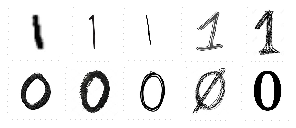

In [3]:
raw_data_dir = './mydataset/raw-data'
a_files = get_files(raw_data_dir, 'one')
b_files = get_files(raw_data_dir, 'zero')
all_files = a_files+b_files
show_images(all_files)

## Step 2: Resize or crop
It is usually necessary to resize or crop images. In class we had large images that we cropped. Here we have images of various sizes. We can pad and resize them. The PIL library allows you to do that. Searching on the Internet I found <a href="https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/">this post</a>. I adapted it to create a function `resize_image`, which I put in `mycode.py` to give you an example of things you could do.

To show you the way I did it, I show you the code I used to test the basic idea. Using your Jupyter notebook, you can always create new cells to try your new ideas and test them. Then you create a small function so you can re-use the code over and over again!

(32, 32)


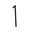

In [4]:
# This is the code I tried, adapting the example from the post
from PIL import Image, ImageOps
desired_size = 32
img = get_image(a_files[1])
old_size = img.size 
ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
img = img.resize(new_size, Image.ANTIALIAS)
delta_w = desired_size - new_size[0]
delta_h = desired_size - new_size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_img = ImageOps.expand(img, padding, fill = '#ffffff')
new_img.size
print(new_img.size)
new_img

(32, 32)


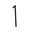

In [5]:
# This checks that the function does the same thing
new_img = resize_image(img, desired_size = 32)
print(new_img.size)
new_img

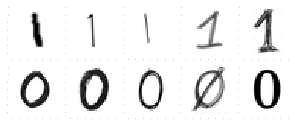

In [6]:
# This applies the function as a filter to show all the dataset
show_images(all_files, resize_image)

## Step 3: Pixel representation
You remember that in class we discovered that we can get pretty good results with a simple pixel representation! Always try this first, this will give you simple baseline results.

Here I put in `mycode.py` a very simple function `extract_resized_image`, which turns an image into a fixed length vection containing the pixels of the resized image. You will find in `utilities.py` a similar function `extract_cropped_image` that does the same thing for cropped images. You can pass either function (or another one that you will write) to the function `preprocess_data` to obtain your data matrices.

In [7]:
X, Y = preprocess_data(a_files, b_files, extract_resized_image)
print(X.shape, Y.shape)

(10, 4096) (10, 1)


Save your dataset for future use.

In [8]:
csv_data_dir = './mydataset/csv-data/'
file_name = os.path.join(csv_data_dir, 'RAW_data.csv')
data_to_csv(X, Y, file_name) 

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,251.0,251.0,251.0,255.0,255.0,255.0,255.0,255.0,1.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
5,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,-1.0
6,255.0,255.0,255.0,255.0,253.0,253.0,253.0,255.0,252.0,252.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,-1.0
7,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,-1.0
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,-1.0
9,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,-1.0


## Step 4: First baseline results
Apply the nearest neighbor method on the pixel representation to see where things stand. We are going to re-load the data from the CSV file into a `pandas` dataframe, which will be convenient to be able to use `pandas` libraries, as needed.

In [9]:
df = pd.read_csv(os.path.join(csv_data_dir, 'RAW_data.csv'))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,251.0,251.0,251.0,255.0,255.0,255.0,255.0,255.0,1.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0


We recommend to use as metric `balanced_accuracy_score`: it is always good, even when classes are balanced, and will allow you also to evaluate your data if classes are not balanced.

We have seen previously that `n_neighbors=1` sometimes overfit the data. Here we suggest `n_neighbors=3`. We have VERY FEW examples... Still, we see that we do better than chance level and the error bars are not too awful.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score as sklearn_metric
sklearn_model = KNeighborsClassifier(n_neighbors=3)

p_tr, s_tr, p_te, s_te = df_cross_validate(df, sklearn_model, sklearn_metric)
metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

AVERAGE TRAINING BALANCED_ACCURACY_SCORE +- STD: 0.97 +- 0.07
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.98 +- 0.05


## Step 5: Create your own data representation
In class we extracted two types of features to separate apples from bananas: redness and elongation. Try also to extract features that are meaningful to your own dataset, to compare with the pixel representation.

### Extract a first simple feature
Check your images, what simple feature could you extract? Here my simple idea was to use the amount of black ink because `zeros` seem to have more ink than `ones`. I created a simple function that computes it call `get_luminosity` in `mycode.py`. I did something pretty simple: I just averaged all the values of the image and since [255, 255, 255] codes for white and [0, 0, 0], what "luminosity" is larger when the image has less "ink".

Using it, we can preprocess all the images and then plot a histogram of the feature to see whether it separates the two classes.

In [11]:
# Here we pass the function get_luminosity to preprocess_data
X, Y = preprocess_data(a_files, b_files, get_luminosity)
print(X.shape, Y.shape)

(10, 1) (10, 1)


In [12]:
# Always save the resulting preprocessed data for later use
file_name = os.path.join(csv_data_dir, 'LUMINOSITY_data.csv')
data_to_csv(X, Y, file_name, ['luminosity', 'class'])

,luminosity,class
0,238.816548,1.0
1,248.222323,1.0
2,252.492208,1.0
3,241.489042,1.0
4,222.603023,1.0
5,222.471686,-1.0
6,214.219709,-1.0
7,233.109360,-1.0
8,219.279895,-1.0
9,211.154452,-1.0


In [13]:
# Then you can reload it as a pandas dataframe as before
df = pd.read_csv(os.path.join(csv_data_dir, 'LUMINOSITY_data.csv'))
df.head()

,luminosity,class
0,238.816548,1.0
1,248.222323,1.0
2,252.492208,1.0
3,241.489042,1.0
4,222.603023,1.0


In [14]:
# Pandas is convenient for visualization
df.style.background_gradient(cmap='Blues').set_precision(3)

,luminosity,class
0,239,1
1,248,1
2,252,1
3,241,1
4,223,1
5,222,-1
6,214,-1
7,233,-1
8,219,-1
9,211,-1


This luminosity feature seems pretty good. It looks like it is correlated with the target. We can double check by computing the Pearson correlation coefficient.

In [15]:
C = df.corr()
C.style.background_gradient(cmap='coolwarm').set_precision(2)

,luminosity,class
luminosity,1,0.75
class,0.75,1


You can also view the density. I got the idea from <a href="https://stackoverflow.com/questions/21548750/plotting-histograms-against-classes-in-pandas-matplotlib">this post.</a> 

ALWAYS CHECK THAT THE RESULTS MAKE SENSE.

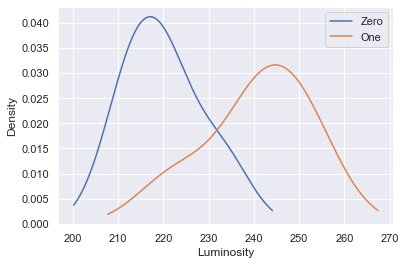

In [16]:
df.groupby('class').luminosity.plot(kind='kde')
plt.xlabel('Luminosity')
plt.legend(['Zero', 'One'])

### Extract another feature

In class, we have defined a certain number of `filters`, which allowed us to separate the object of interest (foreground) from the background. Once we did that, we could compute the "aspect ratio" of the shape (width over height), which gave us another feature. Let us try to do this again!

I wrote a simple filter `my_foreground_filter` inspired by the code we used in class. Check it, you can find it in `mycode.py`. It simply applies a threshold to binarize the image.

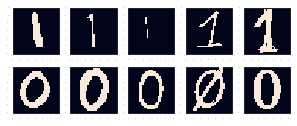

In [17]:
show_images(all_files, my_foreground_filter)

Now all we need to do is to extract the foreground pixels and find their coordinates in the image. Then we can use those coordinates to create a scatter plot of the dark pixels in a two-dimensional space. This will allow us to find then the principal axes of those dots.

In [18]:
img = get_image(a_files[0])
F = my_foreground_filter(img)
xy = np.argwhere(F)

Text(0.5, 1.0, 'Foreground scatterplot')

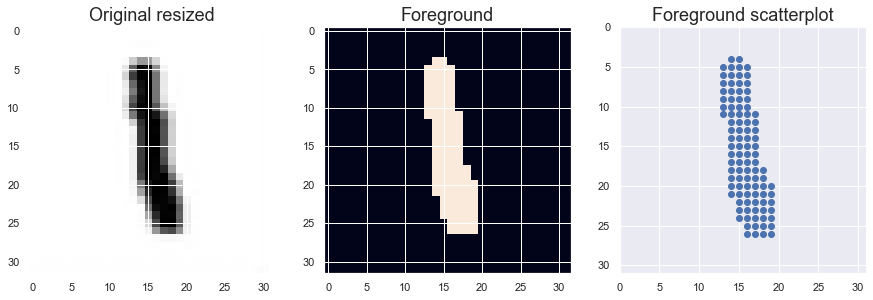

In [19]:
# For comparison we show the original image and the binarized image
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(resize_image(img))
plt.title("Original resized", fontsize=18) 
fig.add_subplot(1, 3, 2)
plt.imshow(my_foreground_filter(img))
plt.title("Foreground", fontsize=18) 
fig.add_subplot(1, 3, 3)
plt.scatter(xy[:,1], xy[:,0])
plt.xlim(0, 31)
plt.ylim(31, 0)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Foreground scatterplot",  fontsize=18) 

Then, similarly to what we did in class, I defined a function `get_elongation`, which you can find in `my_code`. It uses singular value decomposition to find the principal axes. We can print the elongation of the first digit of each class to check that one is larger than the other.

In [20]:
examples = [a_files[0], b_files[0]]
for file in examples:
    img = get_image(file)
    elongation = get_elongation(img)
    print(elongation)

5.022921897055276
1.2397953741052112


Once we think that this feature is implemented well, we still need to verify it is useful. We go through the same steps as before.

In [21]:
# Here we pass the function get_elongation to preprocess_data
X, Y = preprocess_data(a_files, b_files, get_elongation)
print(X.shape, Y.shape)

(10, 1) (10, 1)


In [22]:
# We save the resulting preprocessed data for later use
file_name = os.path.join(csv_data_dir, 'ELONGATION_data.csv')
data_to_csv(X, Y, file_name, ['elongation', 'class'])

,elongation,class
0,5.022922,1.0
1,10.660256,1.0
2,26.205033,1.0
3,2.356267,1.0
4,3.165994,1.0
5,1.239795,-1.0
6,1.409093,-1.0
7,1.625465,-1.0
8,1.747875,-1.0
9,1.320930,-1.0


In [23]:
# We reload it as a pandas dataframe and visualize  
df = pd.read_csv(os.path.join(csv_data_dir, 'ELONGATION_data.csv'))
df.style.background_gradient(cmap='Blues').set_precision(3)

,elongation,class
0,5.02,1
1,10.7,1
2,26.2,1
3,2.36,1
4,3.17,1
5,1.24,-1
6,1.41,-1
7,1.63,-1
8,1.75,-1
9,1.32,-1


In [24]:
# We check that there is good correlation
C = df.corr()
C.style.background_gradient(cmap='coolwarm').set_precision(2)

,elongation,class
elongation,1,0.54
class,0.54,1


### Putting all features together

The "elongation" feature is not quite as correlated with the class target values as was "luminosity", but still, it may be useful, let us keep it and build a dataset with two features: luminosity and elongation.

Inspired by the code in `utilities.py` I wrote a similar function `extract_features`, which I put in `my_code.py`. Now, let us try it!

In [25]:
X, Y = preprocess_data(a_files, b_files, extract_features)
print(X.shape, Y.shape)

(10, 2) (10, 1)


In [26]:
# I call this dataset LE, for luminosity and alongation
file_name = os.path.join(csv_data_dir, 'LE_data.csv')
data_to_csv(X, Y, file_name, ['luminosity', 'elongation', 'class'])

,luminosity,elongation,class
0,238.816548,5.022922,1.0
1,248.222323,10.660256,1.0
2,252.492208,26.205033,1.0
3,241.489042,2.356267,1.0
4,222.603023,3.165994,1.0
5,222.471686,1.239795,-1.0
6,214.219709,1.409093,-1.0
7,233.109360,1.625465,-1.0
8,219.279895,1.747875,-1.0
9,211.154452,1.320930,-1.0


Let us reload the dataset and perform some visualizations.

In [27]:
df = pd.read_csv(os.path.join(csv_data_dir, 'LE_data.csv'))
df.style.background_gradient(cmap='Blues').set_precision(3)

,luminosity,elongation,class
0,239,5.02,1
1,248,10.7,1
2,252,26.2,1
3,241,2.36,1
4,223,3.17,1
5,222,1.24,-1
6,214,1.41,-1
7,233,1.63,-1
8,219,1.75,-1
9,211,1.32,-1


Let us check the correlation matrix. We can see that our two features luminosity and elongation are very correlated. Therefore they do not complement well each other.

In [28]:
C = df.corr()
C.style.background_gradient(cmap='coolwarm').set_precision(2)

,luminosity,elongation,class
luminosity,1,0.73,0.75
elongation,0.73,1,0.54
class,0.75,0.54,1


Another useful view is all pairwise scatter plots. On the diagonal, we show the densities of single features.

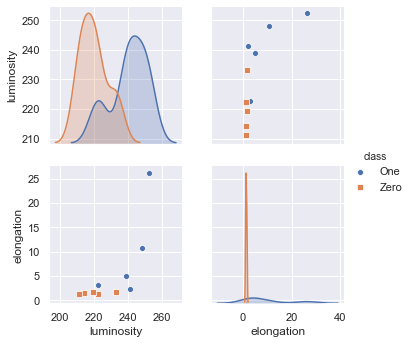

In [29]:
class_name = ['Zero', 'One']
class_list = [class_name[int((i+1)/2)] for i in df["class"].tolist()]
df_new = pd.DataFrame.copy(df)
df_new['class'] = class_list
g = sns.pairplot(df_new, hue="class", markers=["o", "s"])

Notice that the features are on very different scales. This may create problems for some classifiers like nearest neighbors. We should try eventually to normalize (or standardize) them.

## Step 6: Select the best representation
Let us now proceed like we did in the previous class: compare systematically our representations, with and without standardization. Last time we defined together a function `standardize`. I put it for further use in `mycode.py`. Note that I had to improve it a little bit to avoid divisions by zero! 

Like in the previous homework, let us first list all the datasets...

In [30]:
data_list = ls(os.path.join(csv_data_dir, '*_data.csv'))
data_list

['./mydataset/csv-data/LUMINOSITY_data.csv',
 './mydataset/csv-data/RAW_data.csv',
 './mydataset/csv-data/ELONGATION_data.csv',
 './mydataset/csv-data/LE_data.csv']

... and check them.

In [31]:
check_datasets(data_list)

,Dataset,num. examples,num. features,num. apples,num. bananas
0,LUMINOSITY,10,2,5,5
1,RAW,10,4097,5,5
2,ELONGATION,10,2,5,5
3,LE,10,3,5,5


Like last time we will use the nearest neighbor method to select the best representation, without scaling and with scaling. The code snippets below were cut out of the previous homework.

In [32]:
print('NO SCALING')
data_name = [os.path.basename(f)[:-9] for f in data_list]
all_data_df = [pd.read_csv(file) for file in data_list]
result_noscaling = systematic_data_experiment(data_name, all_data_df, sklearn_model, sklearn_metric)
result_noscaling.style.background_gradient(cmap='Blues').set_precision(2)

NO SCALING
KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
LUMINOSITY,0.85,0.1,0.77,0.12
RAW,0.97,0.075,0.98,0.05
ELONGATION,0.85,0.1,0.76,0.2
LE,0.85,0.1,0.74,0.14


In [33]:
print('WITH SCALING')
all_scaled_data_df = [standardize_df(df) for df in all_data_df]
result_scaling = systematic_data_experiment(data_name, all_scaled_data_df, sklearn_model, sklearn_metric)
result_scaling.style.background_gradient(cmap='Blues')

WITH SCALING
KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
LUMINOSITY,0.85,0.104083,0.775,0.118145
RAW,0.858333,0.16266,0.716667,0.211476
ELONGATION,0.85,0.104083,0.758333,0.198781
LE,0.875,0.107044,0.758333,0.131498


In [34]:
joint_results = pd.DataFrame()
joint_results['SCALED'] = result_scaling.perf_te
joint_results['NOT SCALED'] = result_noscaling.perf_te
joint_results.style.background_gradient(cmap='Blues')

,SCALED,NOT SCALED
LUMINOSITY,0.775,0.775
RAW,0.716667,0.983333
ELONGATION,0.758333,0.758333
LE,0.758333,0.741667


It is important to draw CONCLUSIONS at each stage and write the conclusions in the notebook. Here we see that scaling helps only for datasets that have more than one variable (can you understand why?) We also see that the best result is for the raw data un-scaled and that scaling helps a little bit for the LE representation. Can you explain why?

This is perhaps best visualised with a bar graph.

(0.5, 1)

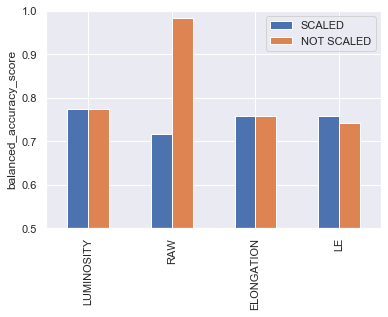

In [35]:
joint_results.plot.bar()
plt.ylabel(sklearn_metric.__name__)
plt.ylim([0.5, 1])

## Step 7: Identify the best model
As in the previous homeworks, we can perform systematic experiments on various models. Use, for instance, the methods proposed in the variable `classifiers` of <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">these scikit-learn examples</a>, compare classifier performances on the best dataset (here this is the raw data).

All the code below was borrowed from the previous homework.

In [36]:
# Select your best representation
data_df = all_scaled_data_df[1]

In [37]:
# Import all your favorite classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model_name = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
model_list = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [38]:
# Make systematic comparisons
compar_results = systematic_model_experiment(data_df, model_name, model_list, sklearn_metric)
compar_results.style.background_gradient(cmap='Blues')

,perf_tr,std_tr,perf_te,std_te
Nearest Neighbors,0.858333,0.16266,0.716667,0.211476
Linear SVM,1,0,0.916667,0.153659
RBF SVM,1,0,0.5,0
Gaussian Process,1,0,0.566667,0.104083
Decision Tree,1,0,0.716667,0.171594
Random Forest,0.983333,0.05,0.816667,0.0897527
Neural Net,1,0,0.9,0.169967
AdaBoost,1,0,0.625,0.163512
Naive Bayes,1,0,0.758333,0.168531
QDA,1,0,0.483333,0.165831


We see here that there are so few training examples that most methods get 100% correct on the training set.

In [39]:
# Find the best classifier
compar_results.perf_te.argmax()

'Linear SVM'

The linear SVM is particularly good usually when you have a lot of features and comparatively few training examples.

In [40]:
# Make an analysis of overfitting
analyze_model_experiments(compar_results)

,perf_tr,std_tr,perf_te,std_te,Overfitted,Underfitted
Nearest Neighbors,0.858333,0.16266,0.716667,0.211476,False,False
Linear SVM,1,0,0.916667,0.153659,False,False
RBF SVM,1,0,0.5,0,True,False
Gaussian Process,1,0,0.566667,0.104083,True,False
Decision Tree,1,0,0.716667,0.171594,False,False
Random Forest,0.983333,0.05,0.816667,0.0897527,False,False
Neural Net,1,0,0.9,0.169967,False,False
AdaBoost,1,0,0.625,0.163512,True,False
Naive Bayes,1,0,0.758333,0.168531,False,False
QDA,1,0,0.483333,0.165831,True,False


Text(0, 0.5, 'balanced_accuracy_score')

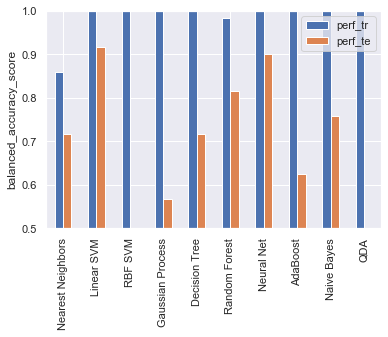

In [41]:
compar_results[['perf_tr', 'perf_te']].plot.bar()
plt.ylim(0.5, 1)
plt.ylabel(sklearn_metric.__name__)

This time the nearest neighbor method did not win. How can you explain that it gets different results as in the previous section?

# Conclusion
Always end with some conclusion. What did you learn? What could be improved?

This project makes you go through a basic data analysis workflow. Other projects go into more details on some specific parts. You could do more in-depth in some parts too, but if you can run your personal dataset through this whole analysis, you will get a good grade.

## ALWAYS TERMINATE YOUR WORK WITH "RESTART AND RUN ALL".